In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp

In [83]:
class Region(object):
    
    def __init__(self,m,n):
        '''
        Create Region with user defined size m * n.
        
        params:
            m,n: int > 0
        '''
        assert isinstance(m,int), "m must be int"
        assert isinstance(n,int), "n must be int"
        assert (m>0) and (n>0), "Please set m>0 and n>0"
        
        self.x_range = m
        self.y_range = n
        self.map = np.zeros((self.x_range,self.y_range))
        self.tower = []
        self.sub_rectangle = []
        
    def show_map(self,size = 5):
        '''
        Print Current Region Map
        
        param: (optional)
            size: int > 0 (self-defined figure size for output)
        '''
        assert isinstance(size,int), "Size parameter must be int"
        assert size>0, "Please set size>0"
        
        plt.figure(figsize=(size,size))
        plt.xlim(xmin = 0, xmax = self.x_range)
        plt.ylim(ymin = 0, ymax = self.y_range)
        if self.get_tower_num() == 0: return # No tower
        
        for num in range(1,self.get_tower_num()+1):
            random_color = np.random.random(3)
            for i in range(self.x_range):
                for j in range(self.y_range):
                    if self.map[i][j] == num:
                        ax = plt.subplot()
                        ax.add_patch(mp.Rectangle((i, j),1,1,alpha=0.5,color=random_color))
        plt.show()

    def add_tower(self,x,y,size_x,size_y):
        '''
        Add new tower
        x,y is the bottom left point of the rectangular area
        
        params:
            x, y: The position of new tower
            size_x, size_y: define size of rectangular area
        '''
        assert isinstance(x,int) and isinstance(y,int), "x and y must be int"
        assert isinstance(size_x,int) and isinstance(size_y,int), "size_x and size_y must be int"
        assert x>=0 and x<self.x_range+1, "Please set 0<=x<"+str(self.x_range+1)
        assert y>=0 and y<self.y_range+1, "Please set 0<=y<"+str(self.y_range+1)
        assert size_x>0 and x+size_x<=self.x_range, "Please set size_x > 0 and x+size_x <= x_range"
        assert size_y>0 and y+size_y<=self.y_range, "Please set size_y > 0 and y+size_y <= y_range"
        
        # Get target area
        target_area = self.map[x:x+size_x, y:y+size_y]
        
        # Check blank area for new tower
        if np.sum((target_area == 0)) == 0:
            return # No un-covered area in target area, cannot add new tower's subsection
        
        # Trim: find maximal blank area for adding new tower's subsection
        max_loc = self.find_max_rectangle(target_area)
        xmin, xmax, ymin, ymax = max_loc[0]+x, max_loc[1]+x, max_loc[2]+y, max_loc[3]+y
        
        # Add tower and its subsection
        for i in range(xmin,xmax):
            for j in range(ymin,ymax):
                self.map[i][j] = self.get_tower_num() + 1
        
        # Store information in class
        self.tower.append((xmin,ymin))
        self.sub_rectangle.append((xmax-xmin,ymax-ymin))
        
    def find_max_rectangle(self,np_map):
        '''
        During adding new tower
        Find max blank rectangular area for trimming
        
        param: 
            np_map = self.map
        return:
            maximal blank rectangular area in target area
            xmin, xmax, ymin, ymax: corresponded location
        '''
        maxArea = 0
        rows = []
        cols = []
        for i in range(0,len(np_map)):
            r_tmp = []
            c_tmp = []
            for j in range(0, len(np_map[0])):
                r_tmp.append(0)
                c_tmp.append(0)
            rows.append(r_tmp)
            cols.append(c_tmp)

        for i in range(len(np_map)-1,-1,-1):
            for j in range(len(np_map[0])-1,-1,-1):
                area_tmp = 0
                if np_map[i][j] == 0:
                    if i == len(np_map)-1:
                        rows[i][j] = 1
                    else:
                        rows[i][j] = rows[i+1][j] + 1
                    if j == len(np_map[0])-1:
                        cols[i][j] = 1
                    else:
                        cols[i][j] = cols[i][j+1]+1
                    area_tmp = cols[i][j]
                    minCol = cols[i][j]
                for k in range(1, rows[i][j]):
                    if minCol > cols[i+k][j]:
                        minCol = cols[i+k][j]
                    if (k+1)*minCol > area_tmp:
                        area_tmp = (k+1)*minCol
                if maxArea < area_tmp:
                    maxArea = area_tmp
                    max_area_loc = (i,j)
                    x_length = int(area_tmp / minCol)
                    y_length = int(minCol)

        xmin = max_area_loc[0]
        xmax = xmin + x_length
        ymin = max_area_loc[1]
        ymax = ymin + y_length

        return xmin, xmax, ymin, ymax
        
    def get_tower_num(self):
        '''
        Get current number of tower in region
        '''
        return len(self.tower)
        

E:\Softwares\Anaconda3\envs\py3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


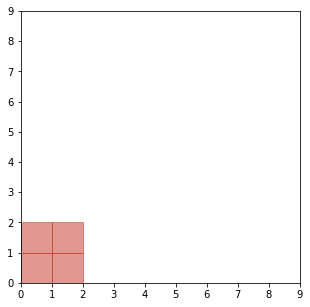

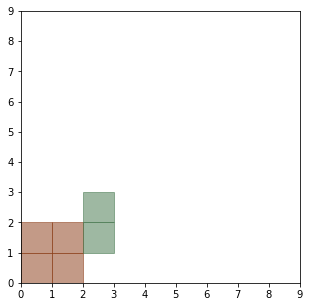

In [85]:
map1 = Region(9,9)
for i in range(2):
    map1.add_tower(i,i,2,2)
    map1.show_map()
